In [1]:
import numpy as np
import matplotlib.pyplot as plt
with open(r"C:\Users\conor\Documents\C++\Variational Methods\Variational_Methods.txt", 'r') as file:
        lines = file.readlines()
        lines = np.array([ value.strip().split('\t') for value in lines[1:]])
        X_0 = [float(x) for x in  lines[:,0]]
        E_0 = [float(x) for x in lines[:,1]]
    

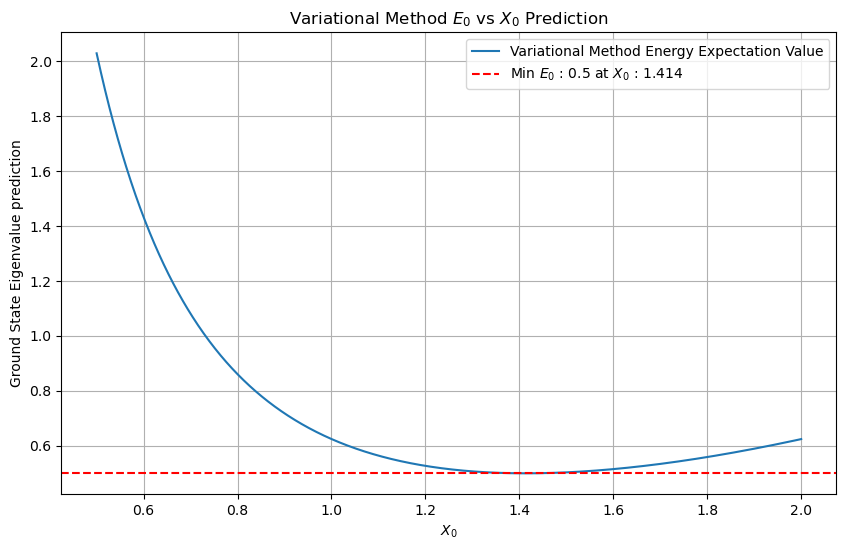

In [2]:
plt.figure(figsize=(10, 6))
plt.plot(list(X_0),list(E_0), label = 'Variational Method Energy Expectation Value')
# Add legend, labels, and title
plt.xlabel('$X_0$')
plt.ylabel('Ground State Eigenvalue prediction')
plt.title('Variational Method $E_0$ vs $X_0$ Prediction')
legend = "Min $E_0$ : " + str(round(min(E_0),4)) + " at $X_0$ : " +  str(X_0[E_0.index(min(E_0))])
plt.axhline(min(E_0), color = 'r', linestyle = 'dashed', label = legend)
plt.legend()
plt.grid()
plt.savefig('Variational Method Initial Result.png')

We know, that from our previous Finite Difference Method study, that the Analytical Solution for the QHO has an $E_0$ of $\frac{\hbar \omega}{2}$. In our C++ code, we set both $\hbar$ & $\omega$ to 1. Therefore, thankfully, our Variational Method has worked!

Now we're going to try replicate the above result using Gradient Descent.

In [3]:
with open(r"C:\Users\conor\Documents\C++\Variational Methods\Gradient_Descent.txt", 'r') as file:
        lines = file.readlines()
        lines = np.array([ value.strip().split('\t') for value in lines[2:]])
        iters = [float(x) for x in lines[:,0]]
        grads = [float(x) for x in lines[:,1]]
        xvals = [float(x) for x in lines[:,2]]
        energy = [float(x) for x in lines[:,3]]

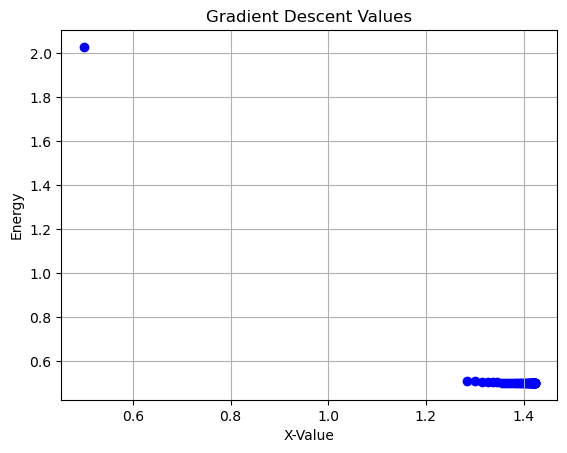

In [4]:
# Create a scatter plot
plt.scatter(xvals, energy, color='blue', marker='o')

# Label the axes
plt.xlabel('X-Value')
plt.ylabel('Energy')

# Add a title
plt.title('Gradient Descent Values')

# Show the plot
plt.grid(True)
plt.show()

Above, we can see our Gradient Descent values plotted, with absolutely 0 context. Which is about as informative as you would expect. We can see that all of our values (bar our initial guess who is all by his lonesome in the top left), are gathered around what we know to be the analytically correct value of 0.5E at about an $x_0$ of around 1.5. 

Below, see this in the context of our already plotted Variational Method result. 

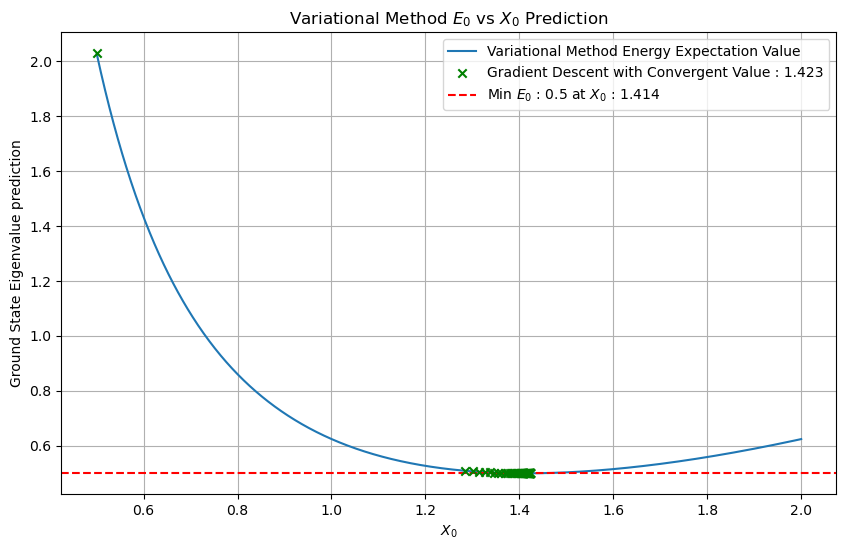

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(list(X_0),list(E_0), label = 'Variational Method Energy Expectation Value')
legend_gradient_descent = 'Gradient Descent with Convergent Value : ' + str(round(xvals[-1],3))
plt.scatter(xvals, energy, color='green', marker='x', zorder = 4, label = legend_gradient_descent )
# Add legend, labels, and title
plt.xlabel('$X_0$')
plt.ylabel('Ground State Eigenvalue prediction')
plt.title('Variational Method $E_0$ vs $X_0$ Prediction')
legend = "Min $E_0$ : " + str(round(min(E_0),2)) + " at $X_0$ : " +  str(round(X_0[E_0.index(min(E_0))],3))
plt.axhline(min(E_0), color = 'r', linestyle = 'dashed', label = legend)
plt.legend()
plt.grid()
plt.savefig('Variational Method Gradient Descent.png')

Now, just for an intuitive understanding (mainly myself) of how Gradient Descent works in 1 dimension, I'll plot the first 3 points, with the slope connecting them. This may be a bit overkill, but it's nice to see anyway. I feel as if a solid understanding of Gradient Descent is important too though, as I often see it used in the 'black box' of Neural Network optimisation techniques, used to fine-tune Node weights and biases. 

In [6]:
point_A = (xvals[0],energy[0])
point_B = (xvals[1],energy[1])
point_C = (xvals[2],energy[2])
m1, m2 = grads[0], grads[1]
x1,x2 = np.linspace(xvals[0], xvals[1]/2, 100), np.linspace(xvals[1], xvals[2]*1.5, 100)
y1,y2 = m1 * (x1 - point_A[0]) + point_A[1], m2 * (x2-point_B[0]) + point_B[1]

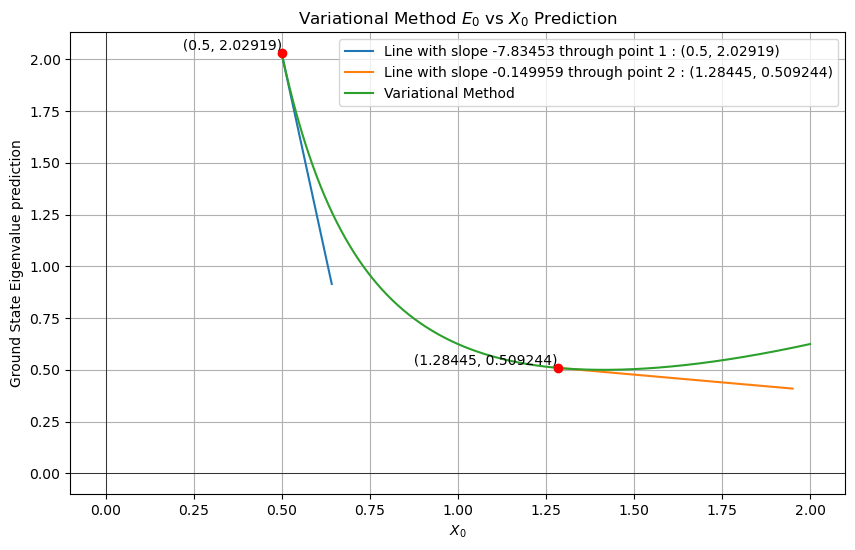

In [7]:
plt.figure(figsize=(10, 6))
# Plot the line
plt.plot(x1, y1, label=f'Line with slope {m1} through point 1 : {point_A}')

# Plot the point
plt.scatter(*point_A, color='red', zorder=5)
plt.text(point_A[0], point_A[1], f'  {point_A}', verticalalignment='bottom', horizontalalignment='right')

# Plot the line
plt.plot(x2, y2, label=f'Line with slope {m2} through point 2 : {point_B}')

# Plot the point
plt.scatter(*point_B, color='red', zorder=5)
plt.text(point_B[0], point_B[1], f'  {point_B}', verticalalignment='bottom', horizontalalignment='right')


plt.plot(list(X_0),list(E_0), label = 'Variational Method')

# Label the axes
plt.xlabel('$X_0$')
plt.ylabel('Ground State Eigenvalue prediction')
plt.title('Variational Method $E_0$ vs $X_0$ Prediction')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.savefig('Gradient Descent Explicit.png')
plt.show()

So, we have the first 2 points in the Gradient Descent approach above plotted, with their respective slopes included in the legend. I have again included the Variational Method approach for reference. At each point, the Gradient of that point is calculated by the following formula:
\begin{equation}
gradient = \frac{f({x_{0} + \epsilon) - f(x_{0})}}{\epsilon}
\end{equation}
Where $\epsilon$ is a small perturbation. In my code, I set it to 0.001. This gradient is then used to update the next $X_{0}$ value.
\begin{equation}
X_{0, i+1} = X_{0,i} - (Learning Rate)* Gradient
\end{equation}
The negative sign above ensures that the new x value will 'swing' back around in case we overshoot the minimum. Learning Rate is a user input parameter, where I used 0.1. This parameter can be anything, but using a value too small, will take forever (slow learning), and using a value too large, you could end up 'yo-yoing' about either side of the minimum indefinitely if the tolerance isn't wide enough. Therefore, by reading around I found 0.1 to be a good compromise. 

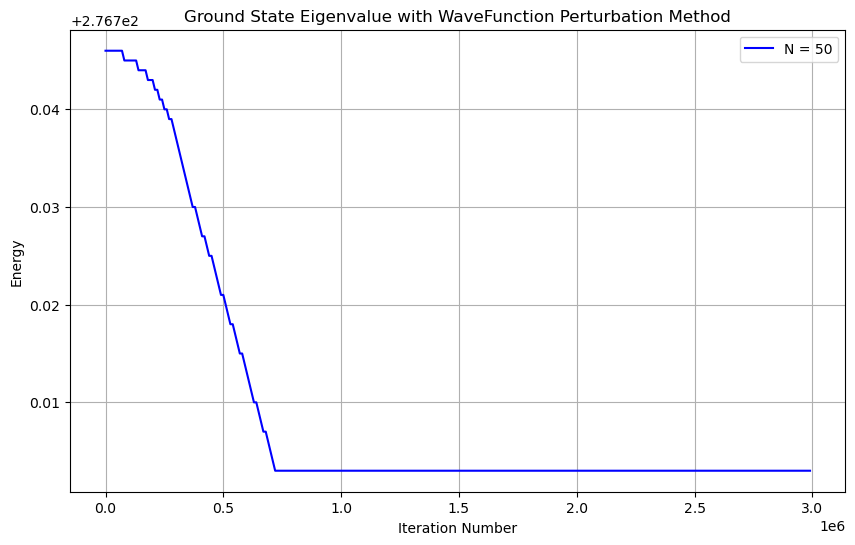

In [8]:
with open(r"C:\Users\conor\Documents\C++\Variational Methods\Wave_Function_Energy_N_50.txt", 'r') as file50:
        lines50 = file50.readlines()
        lines50 = np.array([ value.strip().split('\t') for value in lines50[1:]])
        iters50 = [float(x) for x in lines50[:,0]]
        energy50 = [float(x) for x in lines50[:,1]]
with open(r"C:\Users\conor\Documents\C++\Variational Methods\Wave_Function_Energy_N_100.txt", 'r') as file100:
        lines100 = file100.readlines()
        lines100 = np.array([ value.strip().split('\t') for value in lines100[1:]])
        iters100 = [float(x) for x in lines100[:,0]]
        energy100 = [float(x) for x in lines100[:,1]]
with open(r"C:\Users\conor\Documents\C++\Variational Methods\Wave_Function_Energy_N_200.txt", 'r') as file200:
        lines200 = file200.readlines()
        lines200 = np.array([ value.strip().split('\t') for value in lines200[1:]])
        iters200 = [float(x) for x in lines200[:,0]]
        energy200 = [float(x) for x in lines200[:,1]]
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.plot(iters50, energy50, color='blue', linestyle = 'solid', label = 'N = 50')

# Label the axes
plt.xlabel('Iteration Number')
plt.ylabel('Energy')

# Add a title
plt.title('Ground State Eigenvalue with WaveFunction Perturbation Method')

# Show the plot
plt.grid(True)
plt.legend()
plt.savefig('WaveFunction with N = 50.png')
plt.show()

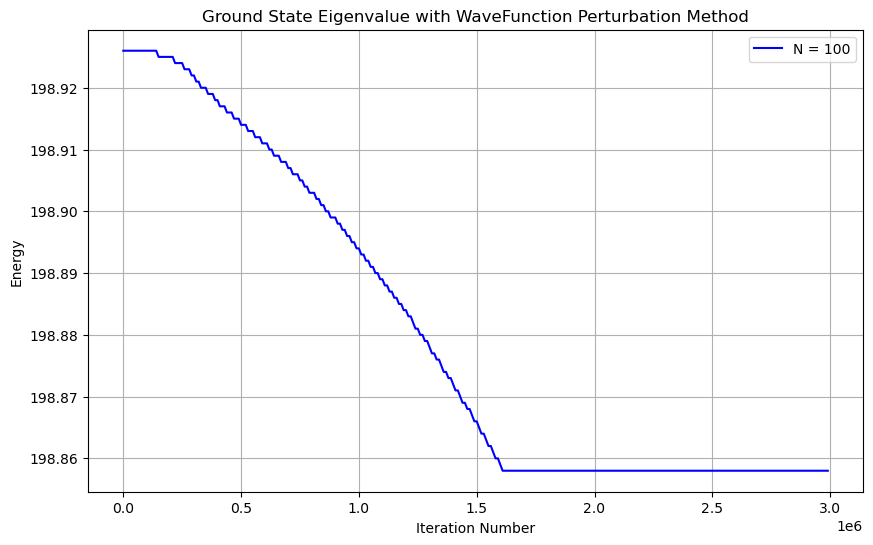

In [9]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.plot(iters100, energy100, color='blue', linestyle = 'solid', label = 'N = 100')

# Label the axes
plt.xlabel('Iteration Number')
plt.ylabel('Energy')

# Add a title
plt.title('Ground State Eigenvalue with WaveFunction Perturbation Method')

# Show the plot
plt.grid(True)
plt.legend()
plt.savefig('WaveFunction with N = 100.png')
plt.show()

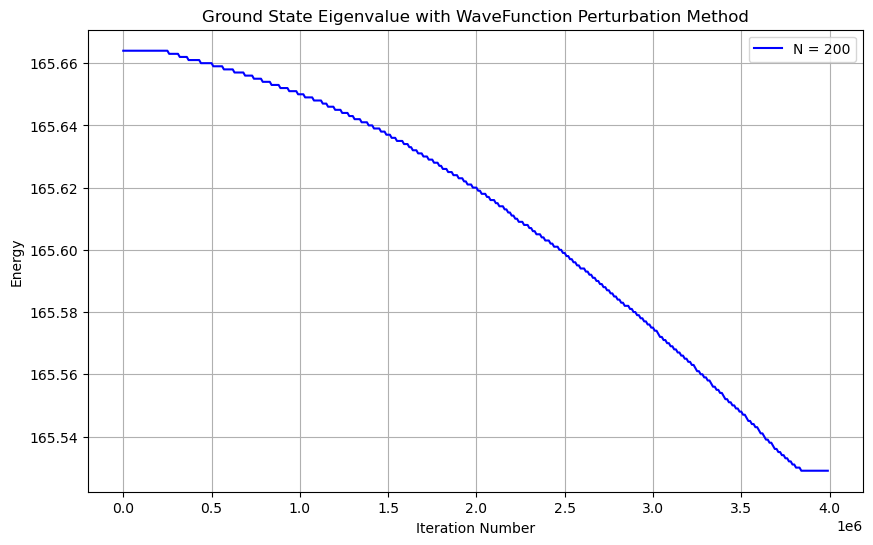

In [10]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.plot(iters200, energy200, color='blue', linestyle = 'solid', label = 'N = 200')

# Label the axes
plt.xlabel('Iteration Number')
plt.ylabel('Energy')

# Add a title
plt.title('Ground State Eigenvalue with WaveFunction Perturbation Method')

# Show the plot
plt.grid(True)
plt.legend()
plt.savefig('WaveFunction with N = 200.png')
plt.show()

In [27]:
def leonnard_jones(x):
    return 40*((1/(pow(x,12)))-(1/(pow(x,6))))
leonnard_jones_values = [float(leonnard_jones(x)) for x in np.linspace(0.7,5,200)]

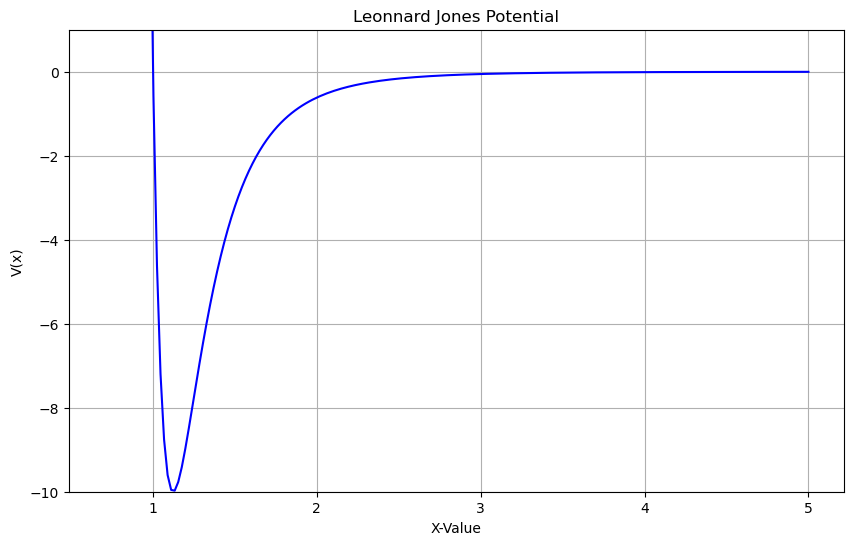

In [29]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.plot(np.linspace(0.7,5,200), leonnard_jones_values, color='blue', linestyle = 'solid')

# Label the axes
plt.xlabel('X-Value')
plt.ylabel('V(x)')

# Add a title
plt.title('Leonnard Jones Potential')

# Show the plot
plt.grid(True)
plt.ylim(-10,1)
plt.show()